 **Partie 1 : Analyse Exploratoire des Données (EDA) pour demande_services_public.csv**

Ce notebook est dédié à l'Analyse Exploratoire des Données (EDA) pour le fichier `demande_services_public.csv`. Il vise à comprendre la structure, la qualité et la distribution des données relatives aux centres de service public.

## Étape 0 : Initialisation et Configuration

In [1]:
# import de librairies necessaires
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Chargement et Exploration Initiale des Données**

In [7]:
try:
    df_demandes = pd.read_csv('../../data_raw/demandes_service_public.csv')
    print("Fichier 'demande_services_public.csv' chargé avec succès.")
except FileNotFoundError:
    print("Erreur: Le fichier 'demande_service_public.csv' n'a pas été trouvé. Tentative de chemin alternatif...")
    df_demandes = pd.read_csv('../data_raw/demandes_service_public.csv')
    print("Chargement avec chemin alternatif réussi.")
except Exception as e:
    print(f"Une erreur est survenue lors du chargement: {e}")


Fichier 'demande_services_public.csv' chargé avec succès.


*Configurations des visualisations*

In [8]:

# 1. Style de fond et grille (Seaborn)
sns.set_style("whitegrid") 

# 2. Taille par défaut des figures (Largeur, Hauteur en pouces)
plt.rcParams['figure.figsize'] = (10, 6)

# 3. Taille de la police pour la lisibilité
plt.rcParams['font.size'] = 12

## Étape 1 : Vue d'Ensemble des Données (Structure et Types)

**Affichage des 5 premières lignes**

In [9]:

display(df_demandes.head()) # Afficher les premières lignes du DataFrame
display(df_demandes.tail()) # Afficher les  5 dernières lignes du DataFrame

,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur
0,D001,Centrale,Sotouboua,Sotouboua,Nyékonakpoé,Carte d'identité,Identité,168,1,0.00,2023-09-30,Perte,Rejetée,En ligne,27,M
1,D002,Kara,Binah,Pagouda,Hôpital,Carte d'identité,Identité,17,22,0.09,2023-12-22,Vol,Traitee,En ligne,21,F
2,D003,Plateaux,Ogou,Atakpamé,Bè,Certificat de nationalité,Identité,104,4,0.08,2023-08-13,Concours,Traitee,En ligne,18,M
3,D004,Savanes,Oti,Mango,Amoutivé,Carte d'identité,Identité,92,39,0.02,2023-06-08,Première demande,Rejetée,Guichet,64,M
4,D005,Maritime,Zio,Tsévié,Adidogomé,Livre de famille,Civil,138,7,0.12,2023-02-02,Détérioration,Rejetée,En ligne,30,M


,demande_id,region,prefecture,commune,quartier,type_document,categorie_document,nombre_demandes,delai_traitement_jours,taux_rejet,date_demande,motif_demande,statut_demande,canal_demande,age_demandeur,sexe_demandeur
595,D596,Kara,Kozah,Kara,Bè,Livre de famille,Civil,15,26,0.07,2023-11-22,Nouveau mariage,Traitee,En ligne,84,M
596,D597,Savanes,Oti,Mango,Amoutivé,Passeport,Voyage,92,38,0.14,2023-07-07,Expiration,Rejetée,Guichet,60,M
597,D598,Maritime,Vo,Vogan,Nyékonakpoé,Certificat de nationalité,Identité,150,44,0.12,2023-08-09,Perte,Rejetée,Guichet,81,M
598,D599,Savanes,Oti,Mango,Agoè,Acte de naissance,Civil,189,3,0.11,2023-08-03,Erreur,Rejetée,En ligne,37,M
599,D600,Maritime,Golfe,Tokoin,Amoutivé,Livre de famille,Civil,134,1,0.08,2023-01-27,Nouveau mariage,Traitee,Guichet,37,M


**Dimensions du DataFrame**

In [10]:
df_demandes.shape

(600, 16)

On constaque qu'il y a 600 enregistrement et 16 colonnes ou attributs

**Informations Générales sur le DataFrame**

In [11]:
df_demandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   demande_id              600 non-null    object 
 1   region                  600 non-null    object 
 2   prefecture              600 non-null    object 
 3   commune                 600 non-null    object 
 4   quartier                600 non-null    object 
 5   type_document           600 non-null    object 
 6   categorie_document      600 non-null    object 
 7   nombre_demandes         600 non-null    int64  
 8   delai_traitement_jours  600 non-null    int64  
 9   taux_rejet              600 non-null    float64
 10  date_demande            600 non-null    object 
 11  motif_demande           600 non-null    object 
 12  statut_demande          600 non-null    object 
 13  canal_demande           600 non-null    object 
 14  age_demandeur           600 non-null    in

### **Constats**

600 lignes complètes : Pas de valeurs manquantes (600 non-null partout)  

Aucun doublon sur demande_id : Chaque demande est unique

#### Types de données :

#### 3 colonnes numériques entières (int64)
1 colonne numérique décimale (float64)
12 colonnes texte (object)  

**Types de Données (Dtype)** :
*date_demande (object)* :  la colonne date_demande est de type object (chaîne de caractères). Elle devra être convertie en datetime pour permettre des analyses temporelles (filtrage par date, extraction de l'année/mois/jour de la semaine, calcul de durées).

taux_rejet (float64) : C'est le bon type pour un taux.  

nombre_demandes, delai_traitement_jours, age_demandeur (int64) : Ces colonnes numériques sont correctement typées comme des entiers.  

*Autres colonnes (object)* : Les colonnes catégorielles comme region, prefecture, commune, quartier, type_document, categorie_document, motif_demande, statut_demande, canal_demande, sexe_demandeur sont de type object, ce qui est approprié.

**Colonnes numériques**


In [12]:
#Obtenir les colonnes numeriques
numeric_cols = df_demandes.select_dtypes(include=['number']).columns
print( "Les colonnes numeriques sont: ",numeric_cols.to_list())


Les colonnes numeriques sont:  ['nombre_demandes', 'delai_traitement_jours', 'taux_rejet', 'age_demandeur']


## Étape 2 : Résumé Statistique et Détection des Anomalies Numériques**

**Statistiques Descriptives des Variables Numériques**

In [13]:
print(df_demandes.describe())

       nombre_demandes  delai_traitement_jours  taux_rejet  age_demandeur
count       600.000000              600.000000  600.000000     600.000000
mean        108.173333               22.716667    0.073617      53.338333
std          56.186607               13.015070    0.043107      20.873509
min          10.000000                1.000000    0.000000      18.000000
25%          59.000000               12.000000    0.040000      36.000000
50%         110.000000               22.000000    0.070000      53.000000
75%         158.000000               34.000000    0.110000      70.000000
max         200.000000               45.000000    0.150000      90.000000


Analyse par variable
--------------------

### **nombre\_demandes**

*   **Plage** : 10 à 200 demandes
    
*   **Moyenne** : 108 demandes
    
*   **Médiane** : 110 demandes
    
*   **Constat** : Distribution plutôt **uniforme et équilibrée** (moyenne ≈ médiane). Volume de demandes stable sans extrêmes.
    

### **delai\_traitement\_jours**

*   **Plage** : 1 à 45 jours
    
*   **Moyenne** : 23 jours
    
*   **Médiane** : 22 jours
    
*   **Écart-type** : 13 jours
    
*   **Constat** :
    
    *   Délais **raisonnablement courts** en moyenne
        
    *   Quelques cas atteignent **45 jours** (potentiellement problématiques)
        
    *   Variabilité modérée mais notable (écart-type = 13)
        
    *   Opportunité d'amélioration : réduire les délais > 30 jours
        

### **taux\_rejet**

*   **Plage** : 0% à 15%
    
*   **Moyenne** : 7.4%
    
*   **Médiane** : 7%
    
*   **Écart-type** : 4.3%
    
*   **Constat** :
    
    *   Taux de rejet **globalement acceptable** (7% en moyenne)
        
    *   **Variabilité importante** : certaines demandes ont 0% de rejet, d'autres 15%
        
    *   Cela suggère des **différences selon le type de document ou la région**
        
    *   Nécessite une analyse approfondie par catégorie pour identifier les problèmes
        

### **age\_demandeur**

*   **Plage** : 18 à 90 ans
    
*   **Moyenne** : 53 ans
    
*   **Médiane** : 53 ans
    
*   **Écart-type** : 21 ans
    
*   **Constat** :
    
    *   Bonne **couverture démographique** (18-90 ans)
        
    *   Moyenne = Médiane → Distribution **quasi-symétrique**
        
    *   Population bien diversifiée en termes d'âge
        
    *   Pas de concentration sur un groupe d'âge spécifique
        


**Analyse des Variables Catégorielles**

In [15]:
# lister les variable categorielle
categorical_cols = df_demandes.select_dtypes(include=['object', 'category']).columns.difference(['date_demande'])
print("Les colonnes catégorielles sont: ",categorical_cols.to_list())

Les colonnes catégorielles sont:  ['canal_demande', 'categorie_document', 'commune', 'demande_id', 'motif_demande', 'prefecture', 'quartier', 'region', 'sexe_demandeur', 'statut_demande', 'type_document']


## Étape 3 : Identification et Traitement Préliminaire des Valeurs Manquantes et des Doublons

**1-Vérification des Valeurs Manquantes**

In [19]:
missing_values = df_demandes.isnull().sum()
print(missing_values)

demande_id                0
region                    0
prefecture                0
commune                   0
quartier                  0
type_document             0
categorie_document        0
nombre_demandes           0
delai_traitement_jours    0
taux_rejet                0
date_demande              0
motif_demande             0
statut_demande            0
canal_demande             0
age_demandeur             0
sexe_demandeur            0
dtype: int64


***Commentaire :*** Il y a pas de donnée manquante dans ce dataset

Le dataset ne contient pas de valeurs manquantes 

In [ ]:
"""print("\nPourcentage de valeurs manquantes par colonne :")
missing_percentage = (df_demandes.isnull().sum() / len(df_demandes) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)"""

**2. Identification des Doublons**

In [17]:
if df_demandes.duplicated().sum() > 0:
    print("Il y a un total de "+ str(df_demandes.duplicated().sum()) + " lignes dupliquées dans le DataFrame df_demandes.")
else:
    print("Il n'y a pas de lignes dupliquées dans le dataset.")

Il n'y a pas de lignes dupliquées dans le dataset.


## Étape 4 : Analyse des Principales Distributions et Détection des Outliers

**@.Distributions des Variables Numériques**

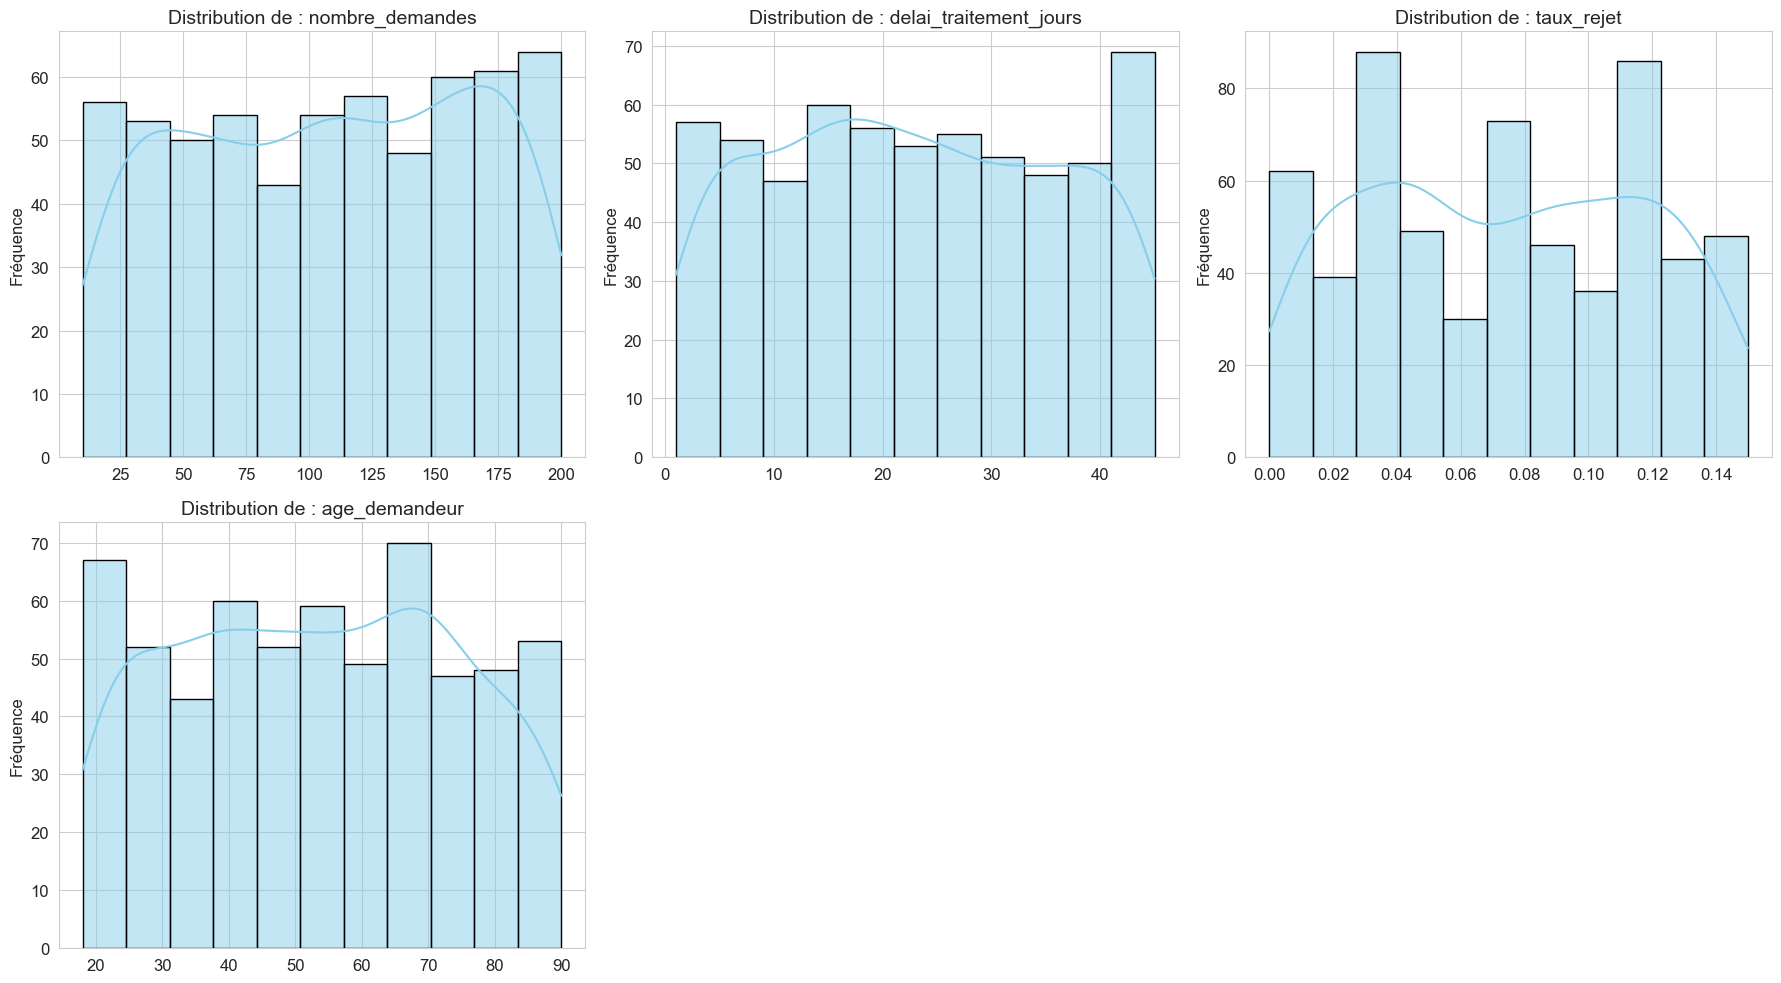

In [20]:
# 1. Liste des colonnes numériques à analyser
cols_numeriques = numeric_cols

# 2. Configuration de la grille (ex: 2 lignes, 3 colonnes)
n_cols = 3
n_rows = (len(cols_numeriques) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() # Convertit la matrice d'axes en liste simple

# 3. Boucle de génération des graphiques
for i, col in enumerate(cols_numeriques):
    sns.histplot(df_demandes[col], kde=True, ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(f'Distribution de : {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Fréquence')

# 4. Supprimer les axes vides si le nombre de colonnes est impair
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\RIG\AppData\Local\Temp\ipykernel_19620\1648088434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_demandes, y='type_document', order=df_demandes['type_document'].value_counts().index, palette='viridis')


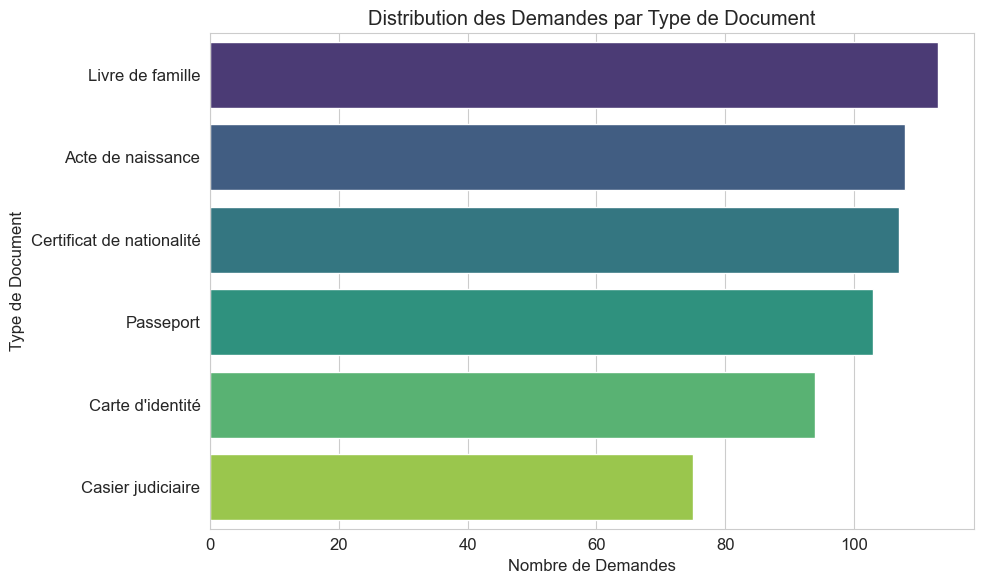

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_demandes, y='type_document', order=df_demandes['type_document'].value_counts().index, palette='viridis')
plt.title('Distribution des Demandes par Type de Document')
plt.xlabel('Nombre de Demandes')
plt.ylabel('Type de Document')
plt.tight_layout()
plt.show()

C:\Users\RIG\AppData\Local\Temp\ipykernel_19620\1185187712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_demandes, y='statut_demande', order=df_demandes['statut_demande'].value_counts().index, palette='plasma')


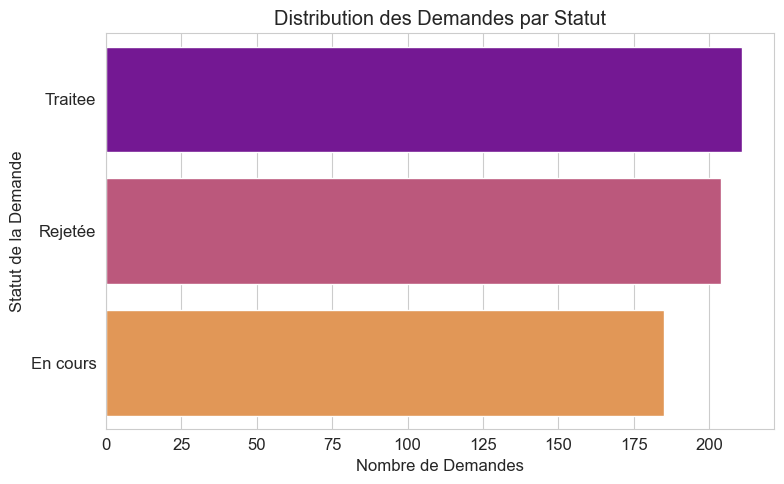

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_demandes, y='statut_demande', order=df_demandes['statut_demande'].value_counts().index, palette='plasma')
plt.title('Distribution des Demandes par Statut')
plt.xlabel('Nombre de Demandes')
plt.ylabel('Statut de la Demande')
plt.tight_layout()
plt.show()

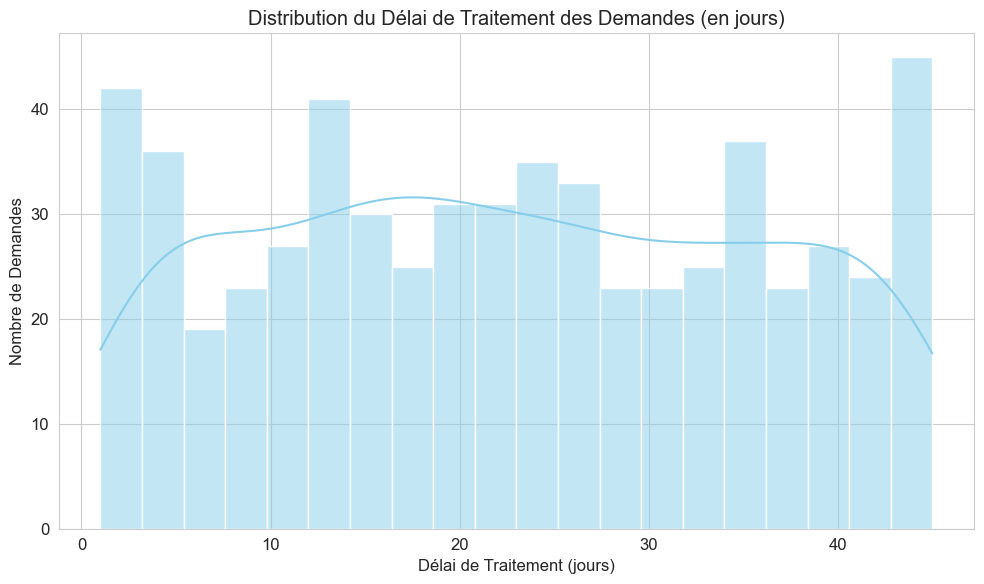

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_demandes['delai_traitement_jours'], bins=20, kde=True, color='skyblue')
plt.title('Distribution du Délai de Traitement des Demandes (en jours)')
plt.xlabel('Délai de Traitement (jours)')
plt.ylabel('Nombre de Demandes')
plt.tight_layout()
plt.show()

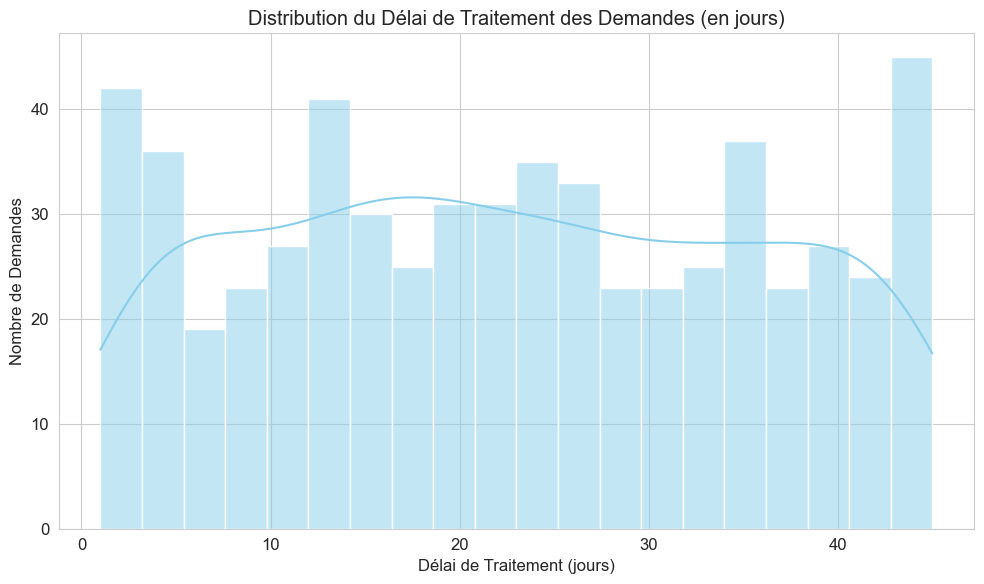

In [25]:

plt.figure(figsize=(10, 6))
sns.histplot(df_demandes['delai_traitement_jours'], bins=20, kde=True, color='skyblue')
plt.title('Distribution du Délai de Traitement des Demandes (en jours)')
plt.xlabel('Délai de Traitement (jours)')
plt.ylabel('Nombre de Demandes')
plt.tight_layout()
plt.show()

**@. Distributions des Variables Catégorielles**

C:\Users\RIG\AppData\Local\Temp\ipykernel_19620\3320708819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_demandes, x='sexe_demandeur', palette='coolwarm')


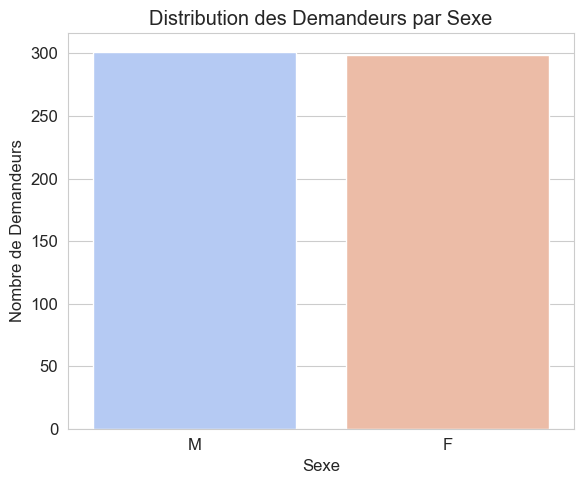

In [26]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df_demandes, x='sexe_demandeur', palette='coolwarm')
plt.title('Distribution des Demandeurs par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de Demandeurs')
plt.tight_layout()
plt.show()



La majorité des centres sont des centres secondaire 

C:\Users\RIG\AppData\Local\Temp\ipykernel_19620\221148583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_demandes, y='canal_demande', order=df_demandes['canal_demande'].value_counts().index, palette='cubehelix')


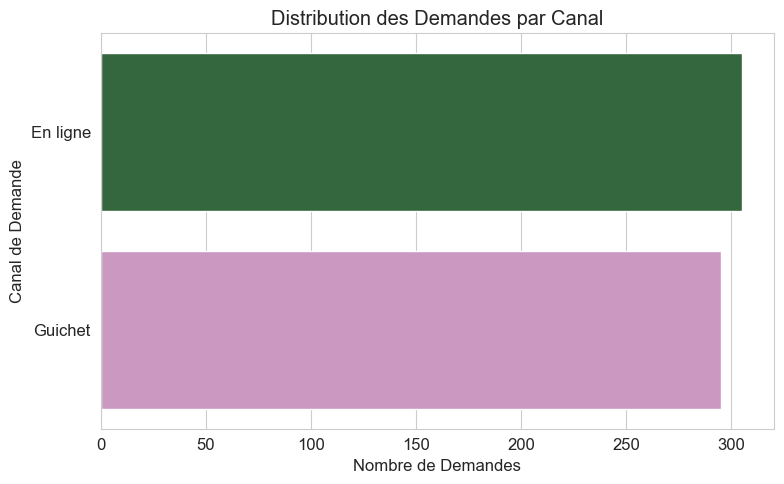

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_demandes, y='canal_demande', order=df_demandes['canal_demande'].value_counts().index, palette='cubehelix')
plt.title('Distribution des Demandes par Canal')
plt.xlabel('Nombre de Demandes')
plt.ylabel('Canal de Demande')
plt.tight_layout()
plt.show()

**Nombre de centre Principaux par region**

C:\Users\RIG\AppData\Local\Temp\ipykernel_19620\522468952.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  demandes_mensuelles = df_demandes.set_index('date_demande').resample('M').agg({


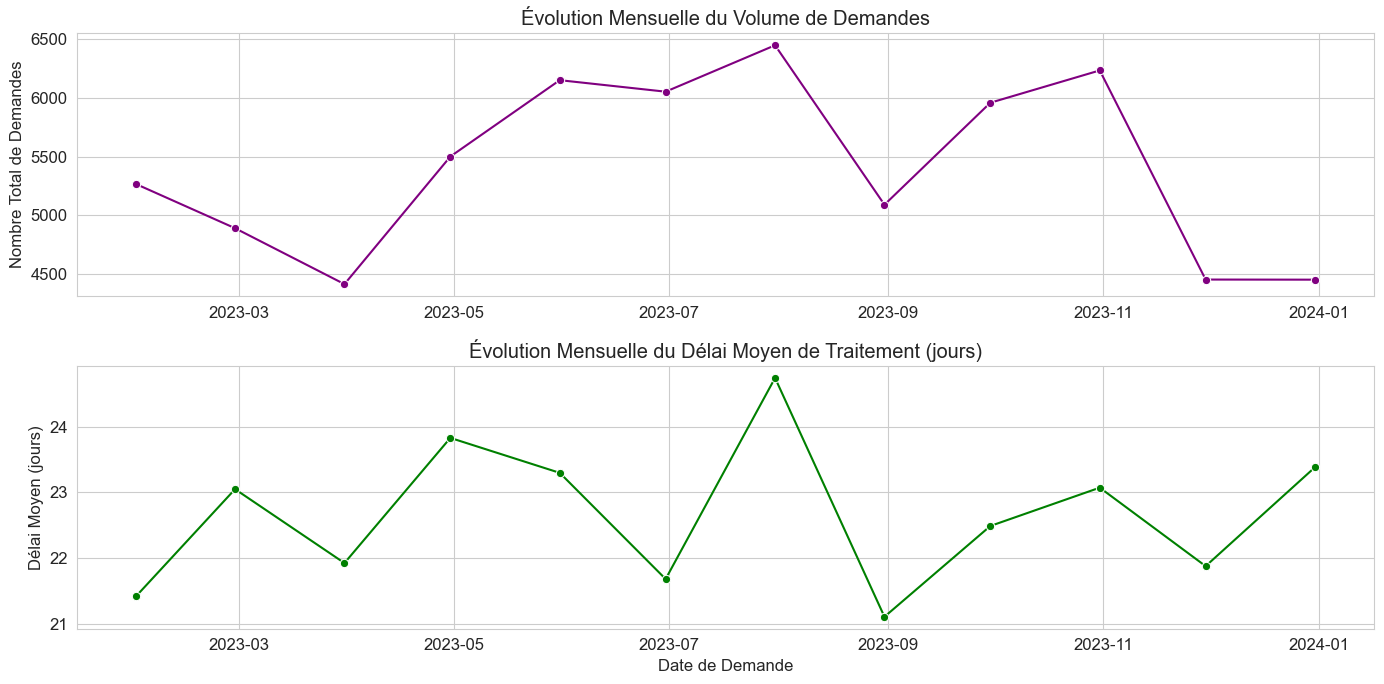

In [29]:
#Convertir 'date_demande' en datetime
df_demandes['date_demande'] = pd.to_datetime(df_demandes['date_demande'])

# Agréger par mois
demandes_mensuelles = df_demandes.set_index('date_demande').resample('M').agg({
    'nombre_demandes': 'sum',
    'delai_traitement_jours': 'mean',
    'taux_rejet': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
sns.lineplot(data=demandes_mensuelles, x='date_demande', y='nombre_demandes', marker='o', color='purple')
plt.title('Évolution Mensuelle du Volume de Demandes')
plt.xlabel('')
plt.ylabel('Nombre Total de Demandes')

plt.subplot(2, 1, 2)
sns.lineplot(data=demandes_mensuelles, x='date_demande', y='delai_traitement_jours', marker='o', color='green')
plt.title('Évolution Mensuelle du Délai Moyen de Traitement (jours)')
plt.xlabel('Date de Demande')
plt.ylabel('Délai Moyen (jours)')

plt.tight_layout()
plt.show()


C:\Users\RIG\AppData\Local\Temp\ipykernel_19620\966549647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_demandes.groupby('region')['nombre_demandes'].sum().reset_index().sort_values(by='nombre_demandes', ascending=False), x='region', y='nombre_demandes', palette='magma')


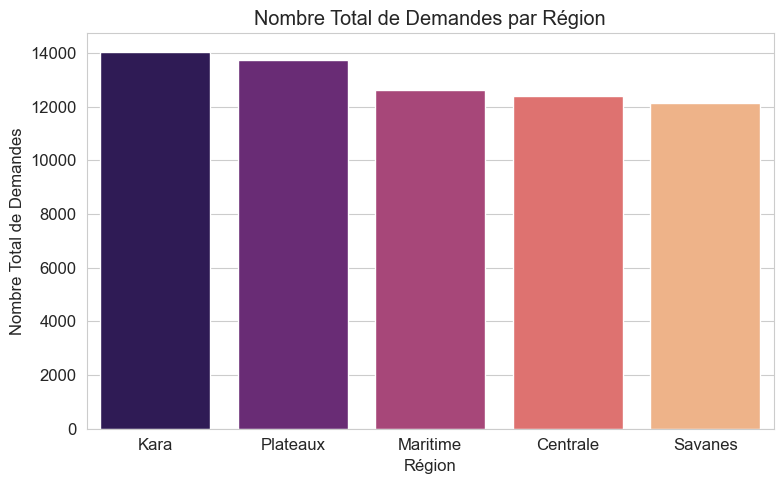

'print("\nPourcentage de valeurs manquantes par colonne :") \nmissing_percentage = (df_demandes.isnull().sum() / len(df_demandes) * 100).sort_values(ascending=False)\nmissing_percentage = missing_percentage[missing_percentage > 0]\nprint(missing_percentage)'

In [38]:
#nombre total de demandes par region
df_demandes.groupby('region')['nombre_demandes'].sum().sort_values(ascending
=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=df_demandes.groupby('region')['nombre_demandes'].sum().reset_index().sort_values(by='nombre_demandes', ascending=False), x='region', y='nombre_demandes', palette='magma')
plt.title('Nombre Total de Demandes par Région')
plt.xlabel('Région')
plt.ylabel('Nombre Total de Demandes')
plt.tight_layout()
plt.show()


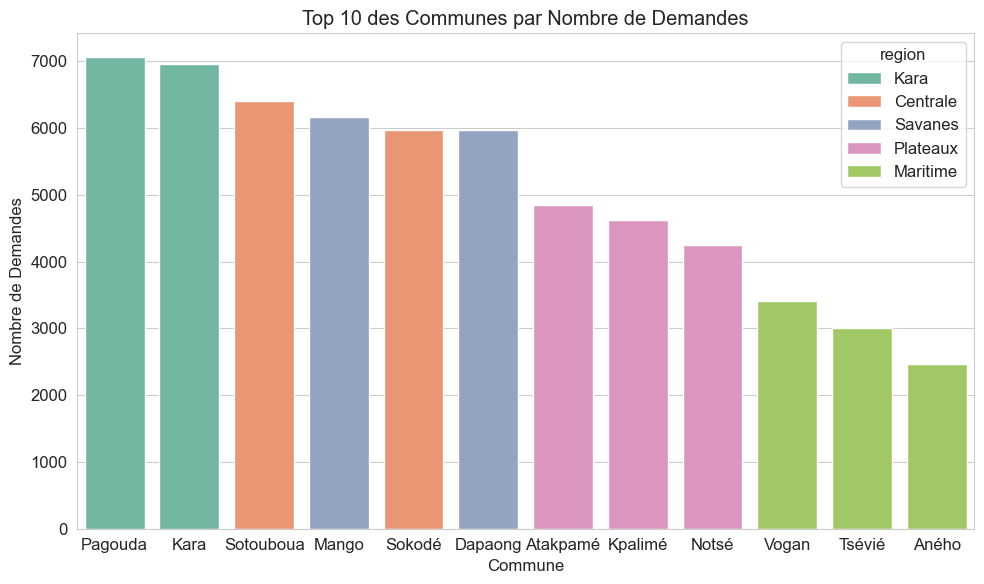

In [43]:
#Nombre de demande par commune de la meme region 
df_demandes.groupby(['region', 'commune'])['nombre_demandes'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_demandes.groupby(['region', 'commune'])['nombre_demandes'].sum().reset_index().sort_values(by='nombre_demandes', ascending=False).head(12), x='commune', y='nombre_demandes', hue='region', palette='Set2')
plt.title('Top 10 des Communes par Nombre de Demandes')
plt.xlabel('Commune')
plt.ylabel('Nombre de Demandes')
plt.tight_layout()
plt.show()

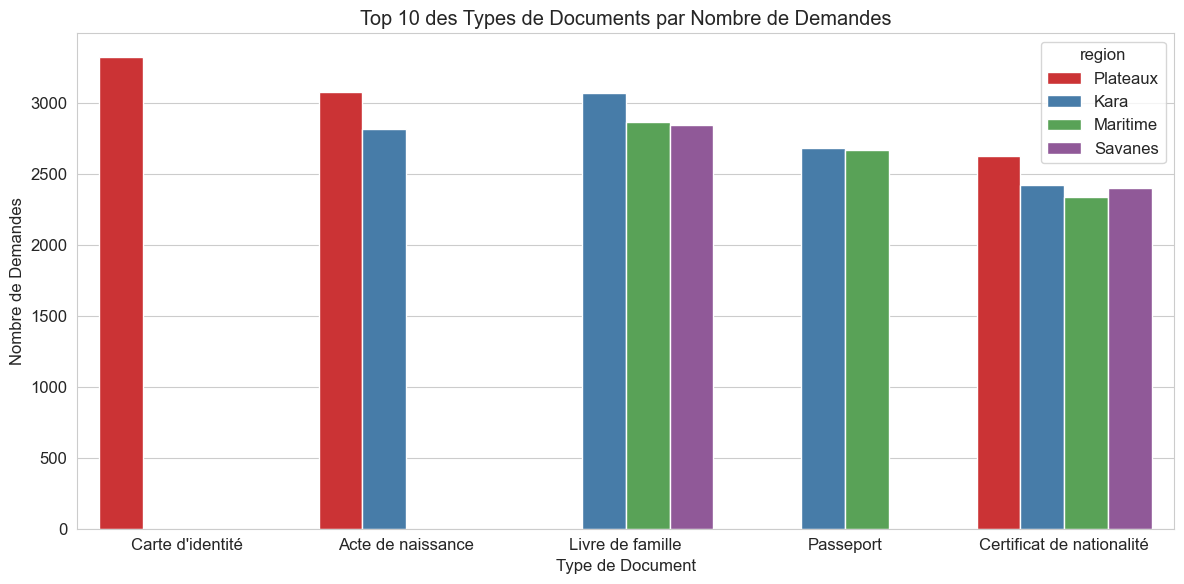

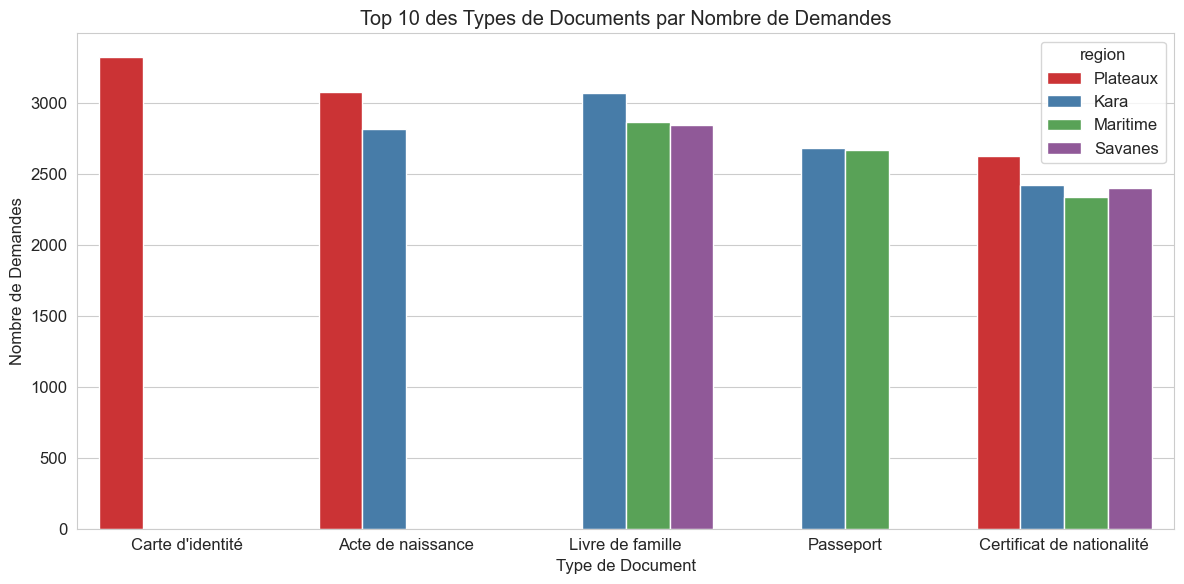

In [47]:
#type de document le plus demandé par région
df_demandes.groupby(['region', 'type_document'])['nombre_demandes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_demandes.groupby(['region', 'type_document'])['nombre_demandes'].sum().reset_index().sort_values(by='nombre_demandes', ascending=False).head(12), x='type_document', y='nombre_demandes', hue='region', palette='Set1')
plt.title('Top 10 des Types de Documents par Nombre de Demandes')
plt.xlabel('Type de Document')
plt.ylabel('Nombre de Demandes')
plt.tight_layout()
plt.show()
#Nombre total de rejet superposé au nombre de traité dans chaque commun

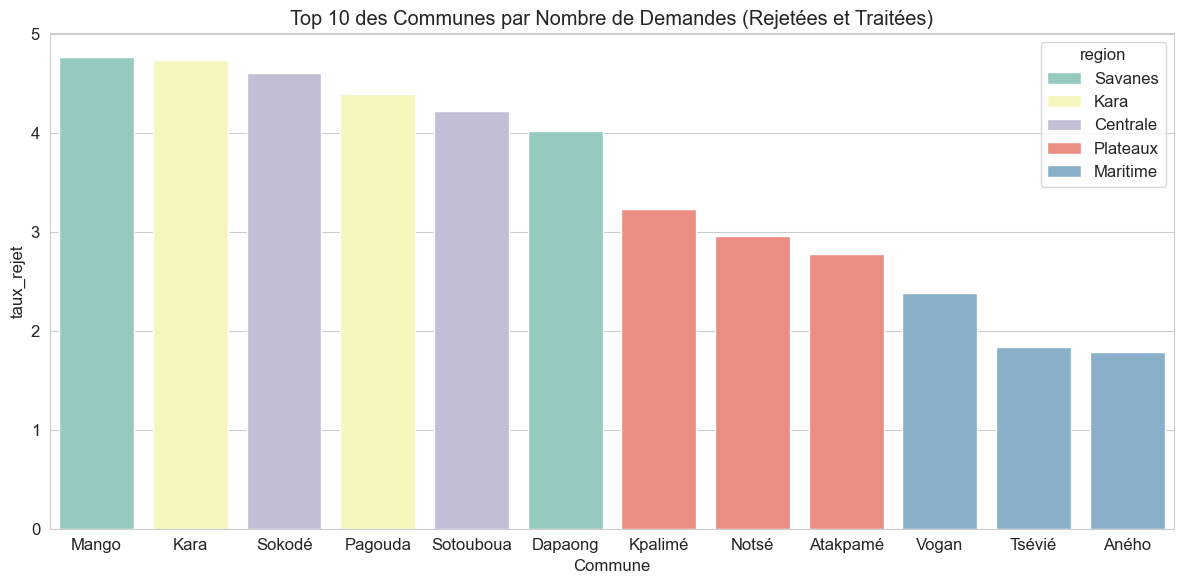

In [46]:
#Nombre total de rejet superposé au nombre de traité dans chaque commune 
df_demandes.groupby(['region', 'commune'])['taux_rejet'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_demandes.groupby(['region', 'commune'])['taux_rejet'].sum().reset_index().sort_values(by='taux_rejet', ascending=False).head(12), x='commune', y='taux_rejet', hue='region', palette='Set3')
plt.title('Top 10 des Communes par Nombre de Demandes (Rejetées et Traitées)')
plt.xlabel('Commune')
plt.ylabel('taux_rejet')
plt.tight_layout()
plt.show()


Matrice de Corrélation :
                        nombre_demandes  delai_traitement_jours  taux_rejet  \
nombre_demandes                1.000000               -0.048379    0.003311   
delai_traitement_jours        -0.048379                1.000000   -0.014001   
taux_rejet                     0.003311               -0.014001    1.000000   
age_demandeur                  0.054998                0.030458   -0.010788   

                        age_demandeur  
nombre_demandes              0.054998  
delai_traitement_jours       0.030458  
taux_rejet                  -0.010788  
age_demandeur                1.000000  


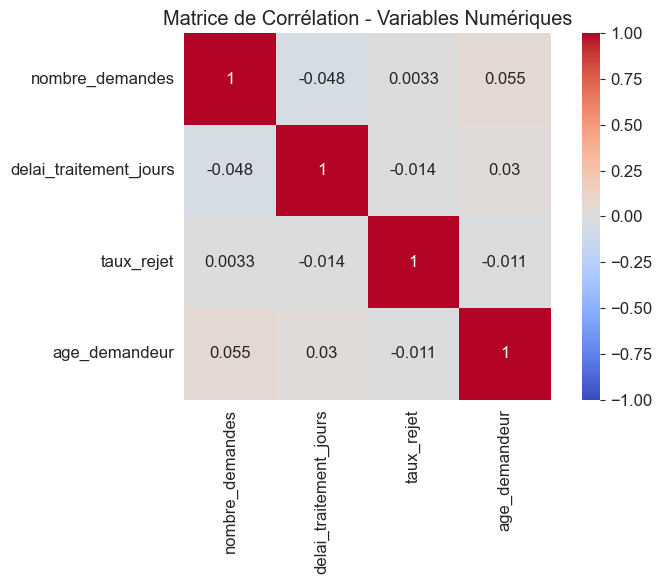

In [33]:
# Sélectionner les colonnes numériques
colonnes_numeriques = df_demandes[['nombre_demandes', 'delai_traitement_jours', 'taux_rejet', 'age_demandeur']]

# Calculer la matrice de corrélation
correlation_matrix = colonnes_numeriques.corr()

print("Matrice de Corrélation :")
print(correlation_matrix)

# Visualiser la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True)
plt.title('Matrice de Corrélation - Variables Numériques')
plt.tight_layout()
plt.show()

**Répartition géographique des 55 centres.**

In [36]:
# Option 1: compter les combinaisons uniques (region, nombre_demandes)
df_demandes[['region', 'nombre_demandes']].value_counts()

# Option 2 (recommandé) : sommer le nombre de demandes par région
df_demandes.groupby('region')['nombre_demandes'].sum().sort_values(ascending=False)

region
Kara        14033
Plateaux    13730
Maritime    12618
Centrale    12387
Savanes     12136
Name: nombre_demandes, dtype: int64

## **Partie 2 : Nettoyage et Préparation des Données pour demande_services_public.csv**

In [ ]:
import os 
import sys 

# 1. Ajout du chemin au système
module_path = r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees"
if module_path not in sys.path:
    sys.path.append(module_path)

# 2. Import
from clean_demandes_data import clean_demandes_data

# 3. Appel avec le paramètre correct (input_path)
# La fonction va charger le CSV, le nettoyer et vous retourner le DataFrame
                   
df_cleaned = clean_demandes_data(input_path=r"../../data_raw/demandes_service_public.csv",output_path='../../02_Nettoyage_et_Preparation_des_Donnees/data_cleaned/demande_services_public_cleaned.csv', documentation_path='../../02_Nettoyage_et_Preparation_des_Donnees/data_cleaned/documentation_demandes_cleaning.txt' )

# 4. Vérification rapide
if df_cleaned is not None:
    print(f"Nettoyage réussi ! Nombre de lignes : {len(df_cleaned)}")

Chargement de ../../data_raw/demandes_service_public.csv réussi. Dimensions initiales: (600, 16)
Converti 'date_demande' de object à datetime.
Aucun doublon trouvé sur 'demande_id'.
Traitement de 'motif_demande': 0 manquants avant. Imputés par 'Non Applicable' ou 'Non Spécifié (Rejet)'.
Traitement de 'quartier': 0 manquants avant. Imputés par 'Inconnu'.
Traitement de 'age_demandeur': 0 manquants avant. Imputés par la médiane (53.0). Converti en entier.
Traitement de 'sexe_demandeur': 0 manquants avant. Imputés par le mode (M).
Harmonisation de la capitalisation et suppression des espaces pour les colonnes catégorielles pertinentes.
Ajout des colonnes 'annee_demande', 'mois_demande', 'jour_semaine_demande'.
Dimensions finales du DataFrame nettoyé: (600, 19)
Dataset nettoyé sauvegardé à: ../../02_Nettoyage_et_Preparation_des_Donnees/data_cleaned/demande_services_public_cleaned.csv
Documentation des choix de nettoyage sauvegardée à: ../../02_Nettoyage_et_Preparation_des_Donnees/data_clean

D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees\clean_demandes_data.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['motif_demande'].fillna('Non Spécifié (Rejet)', inplace=True) # Pour les rejets sans motif
D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees\clean_demandes_data.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace m